In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Data/loan_data.csv')

# 1. Data Cleaning

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.shape

(45000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## 1.1. Handling missing values

No missing values

In [6]:
# Missing values per column
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

## 1.2. Handling Outliers

In [7]:
#Statistical summary of numerical columns
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
#Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns 

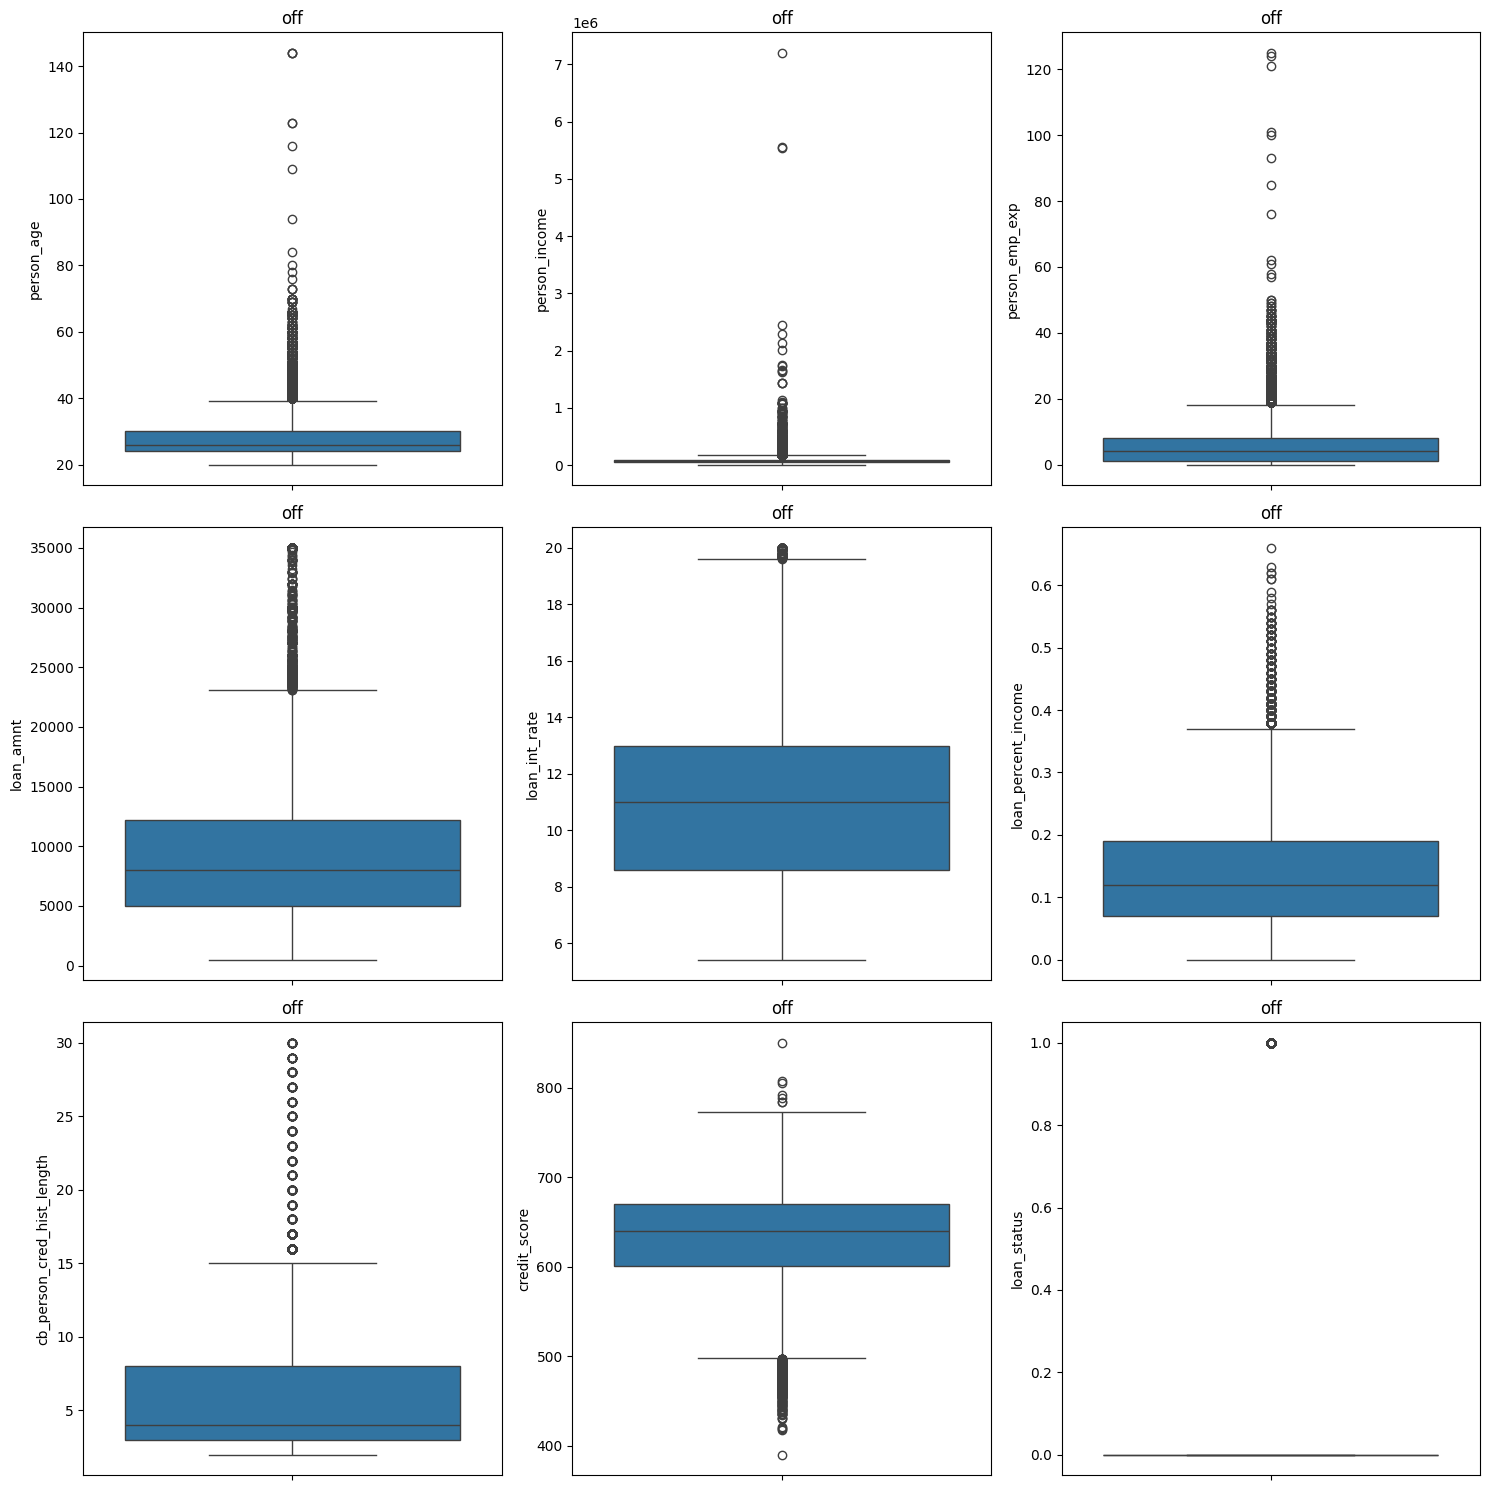

In [9]:
# Making boxplots to detect outliers for these numerical variables
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, n_rows * 5))
axes = axes.flatten()

#Boxplot for each numerical value 
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title('off')
    
plt.tight_layout()
plt.show() 

**<span style="color:red;">Observations</span>**

- `person_age` : Most people are young (20-30 yo) , max = 144 is an outlier
- `person_income` : The max 7200766$ annual income is an abnormal value, likely an outlier too
- `person_emp_exp` : The median shows that most clients have relatively short employment histories ( 4 years). A maximum of 125 years is unrealistic.
- `loan_amnt` : Loans are small to medium-sized ( max is only 35k)
- `loan_int_rate` : max = 66% indicates that borrowers dedicate 66% of their income to the loan payment which means that they might represent a loan default (can't pay back)

In [10]:
person_age_outliers = df[df['person_age'] > 115].shape[0]
print("Number of clients with age > 115 : ", person_age_outliers)

person_income_outliers = df[df['person_income'] > 3.0e+06].shape[0]
print("Number of clients with income > 3M $ : ", person_income_outliers)

person_emp_exp_outliers = df[df['person_emp_exp'] > 90].shape[0]
print("Number of clients with employment experience > 90 : " , person_emp_exp_outliers)

Number of clients with age > 115 :  6
Number of clients with income > 3M $ :  3
Number of clients with employment experience > 90 :  6


In [11]:
df.loc[df['person_income'].idxmax()]

person_age                            144.0
person_gender                        female
person_education                  Associate
person_income                     7200766.0
person_emp_exp                          124
person_home_ownership              MORTGAGE
loan_amnt                            5000.0
loan_intent                        PERSONAL
loan_int_rate                         12.73
loan_percent_income                     0.0
cb_person_cred_hist_length             25.0
credit_score                            850
previous_loan_defaults_on_file           No
loan_status                               0
Name: 32297, dtype: object

In [12]:
max_age = 110

# Delete values greater than max_age
df.drop(df.loc[df['person_age'] > max_age].index, inplace=True)

In [13]:
df.loc[df['person_emp_exp'].idxmax()]

person_age                              109.0
person_gender                            male
person_education                  High School
person_income                       5556399.0
person_emp_exp                             85
person_home_ownership                MORTGAGE
loan_amnt                              6195.0
loan_intent                           VENTURE
loan_int_rate                           12.58
loan_percent_income                       0.0
cb_person_cred_hist_length               22.0
credit_score                              792
previous_loan_defaults_on_file             No
loan_status                                 0
Name: 38113, dtype: object

In [14]:
df.loc[df['person_income'].idxmax()]

person_age                              109.0
person_gender                            male
person_education                  High School
person_income                       5556399.0
person_emp_exp                             85
person_home_ownership                MORTGAGE
loan_amnt                              6195.0
loan_intent                           VENTURE
loan_int_rate                           12.58
loan_percent_income                       0.0
cb_person_cred_hist_length               22.0
credit_score                              792
previous_loan_defaults_on_file             No
loan_status                                 0
Name: 38113, dtype: object

In [15]:
df.loc[df['person_income'].idxmax()]

person_age                              109.0
person_gender                            male
person_education                  High School
person_income                       5556399.0
person_emp_exp                             85
person_home_ownership                MORTGAGE
loan_amnt                              6195.0
loan_intent                           VENTURE
loan_int_rate                           12.58
loan_percent_income                       0.0
cb_person_cred_hist_length               22.0
credit_score                              792
previous_loan_defaults_on_file             No
loan_status                                 0
Name: 38113, dtype: object

In [16]:
df.shape

(44994, 14)

**Deleting the unrealistic values of the column `person_age` fixed the other outlier values**

# 2. Exploratory Data Analysis

In [17]:
categorical_cols = ['person_education','person_home_ownership','loan_intent']
numerical_cols = ['person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
binary_cols = ['loan_status','person_gender','previous_loan_defaults_on_file']

## Feature distribution

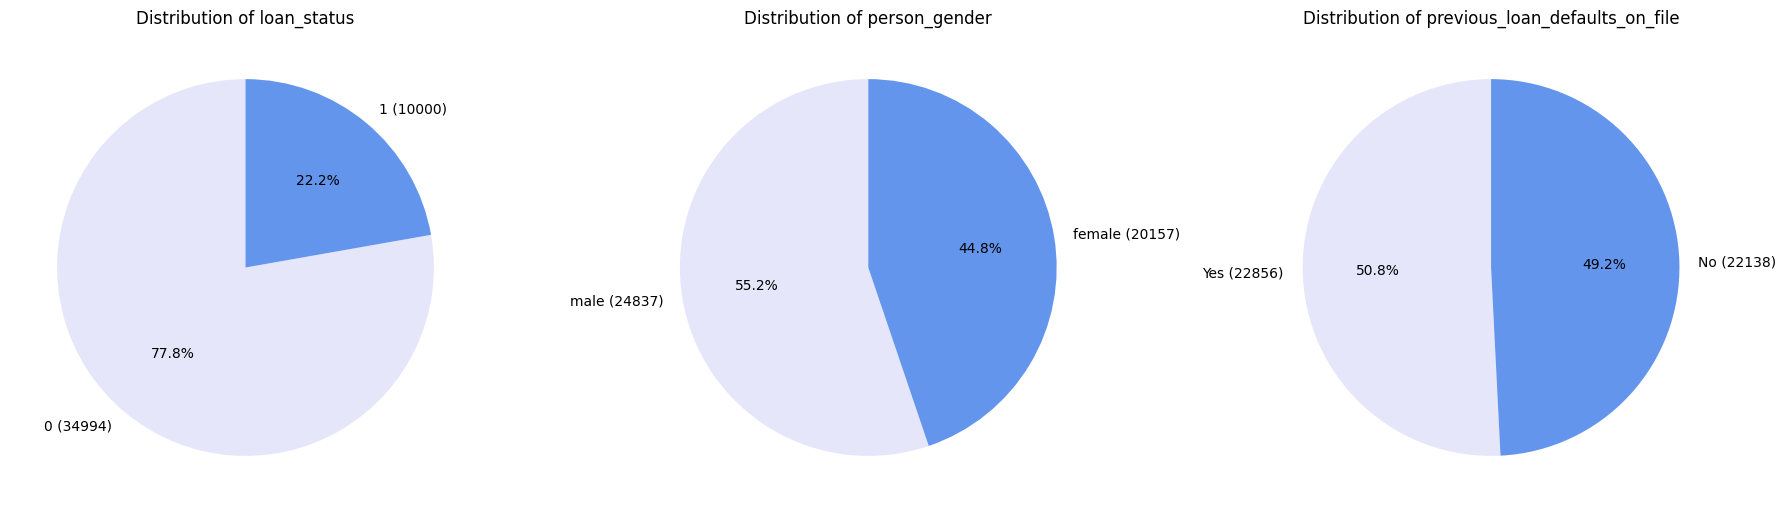

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    counts = df[col].value_counts()
    labels = [f'{index} ({value})' for index, value in zip(counts.index, counts.values)]
    axes[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#E6E6FA', '#6495ED'])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)

plt.tight_layout()
plt.show()

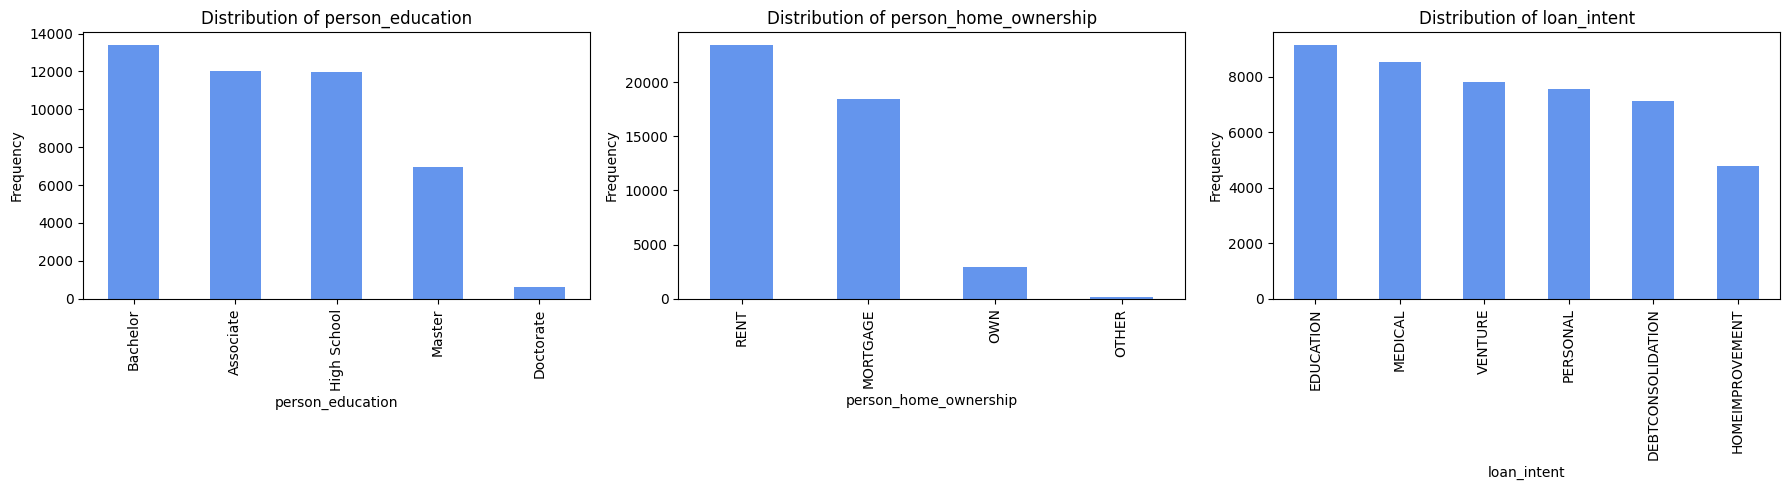

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, column in enumerate(categorical_cols):
    df[column].value_counts().plot(kind='bar', color='#6495ED', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

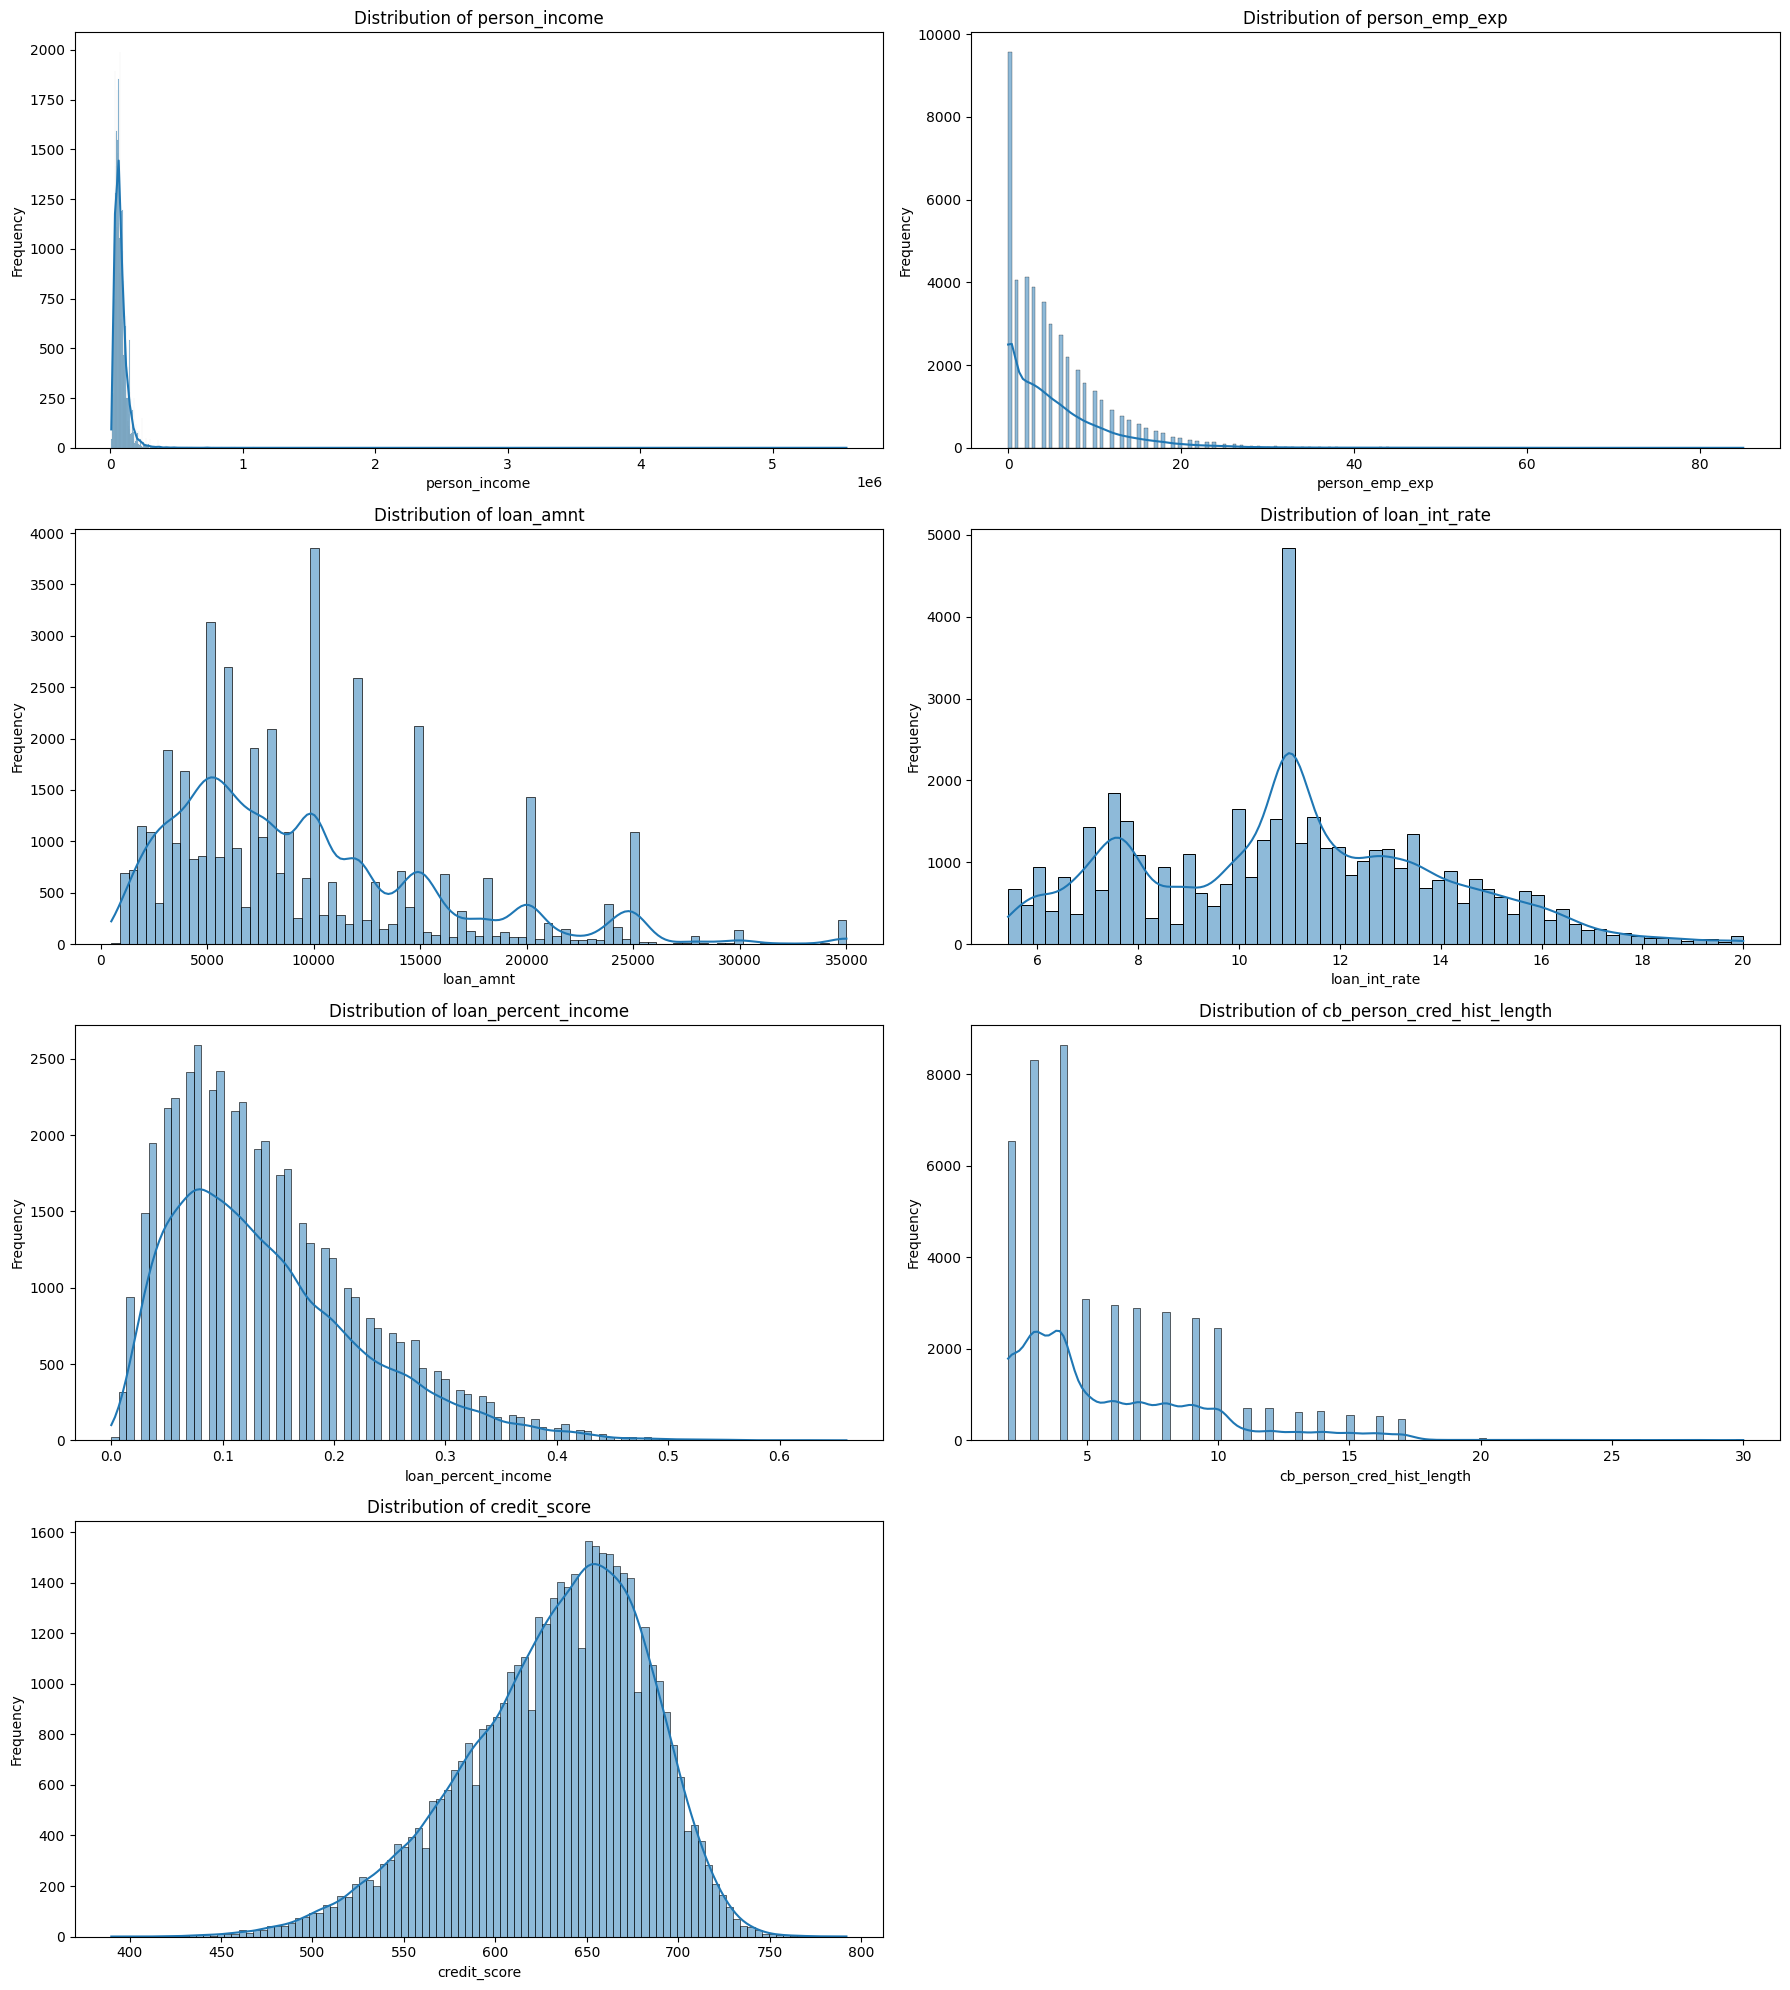

In [20]:
num_cols_per_row = 2
num_rows = -(-len(numerical_cols) // num_cols_per_row) 
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Numerical features vs target feature

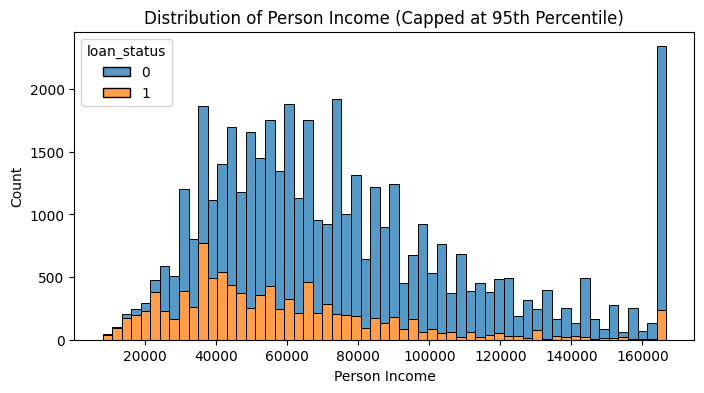

In [21]:
person_income_capped = df['person_income'].clip(upper=df['person_income'].quantile(0.95))

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x= person_income_capped, hue='loan_status', multiple='stack')
plt.title('Distribution of Person Income (Capped at 95th Percentile)')
plt.xlabel('Person Income')
plt.ylabel('Count')
plt.show()

## Categorical features vs target feature

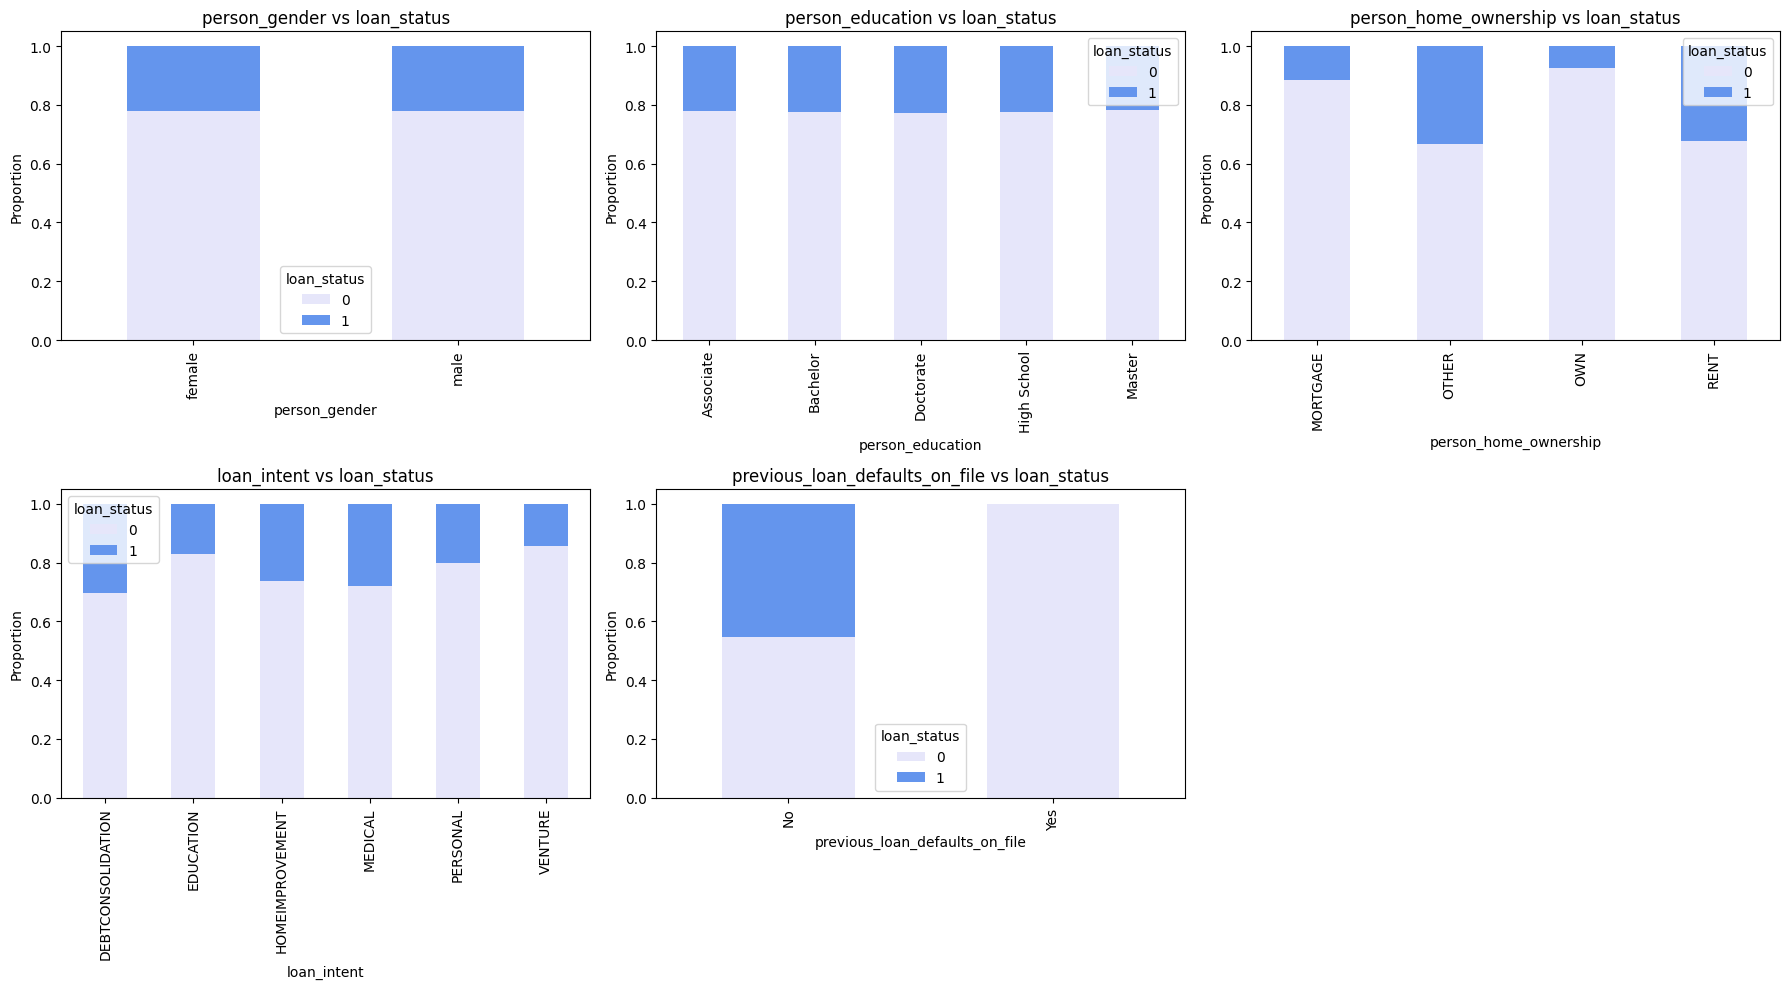

In [22]:
columns = df.select_dtypes(include=['object', 'category']).columns
fig, axes = plt.subplots(len(columns) // 3 + 1, 3, figsize=(18, 5 * (len(columns) // 3 + 1)))
axes = axes.flatten()

for i, col in enumerate(columns):
    proportions = (df.groupby([col, 'loan_status'])
                     .size()
                     .unstack(fill_value=0))
    proportions = proportions.div(proportions.sum(axis=1), axis=0)
    proportions.plot(kind='bar', stacked=True, color=['#E6E6FA', '#6495ED'], ax=axes[i])
    axes[i].set_title(f'{col} vs loan_status')
    axes[i].set_ylabel('Proportion')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Pair Plotting

<Figure size 1000x800 with 0 Axes>

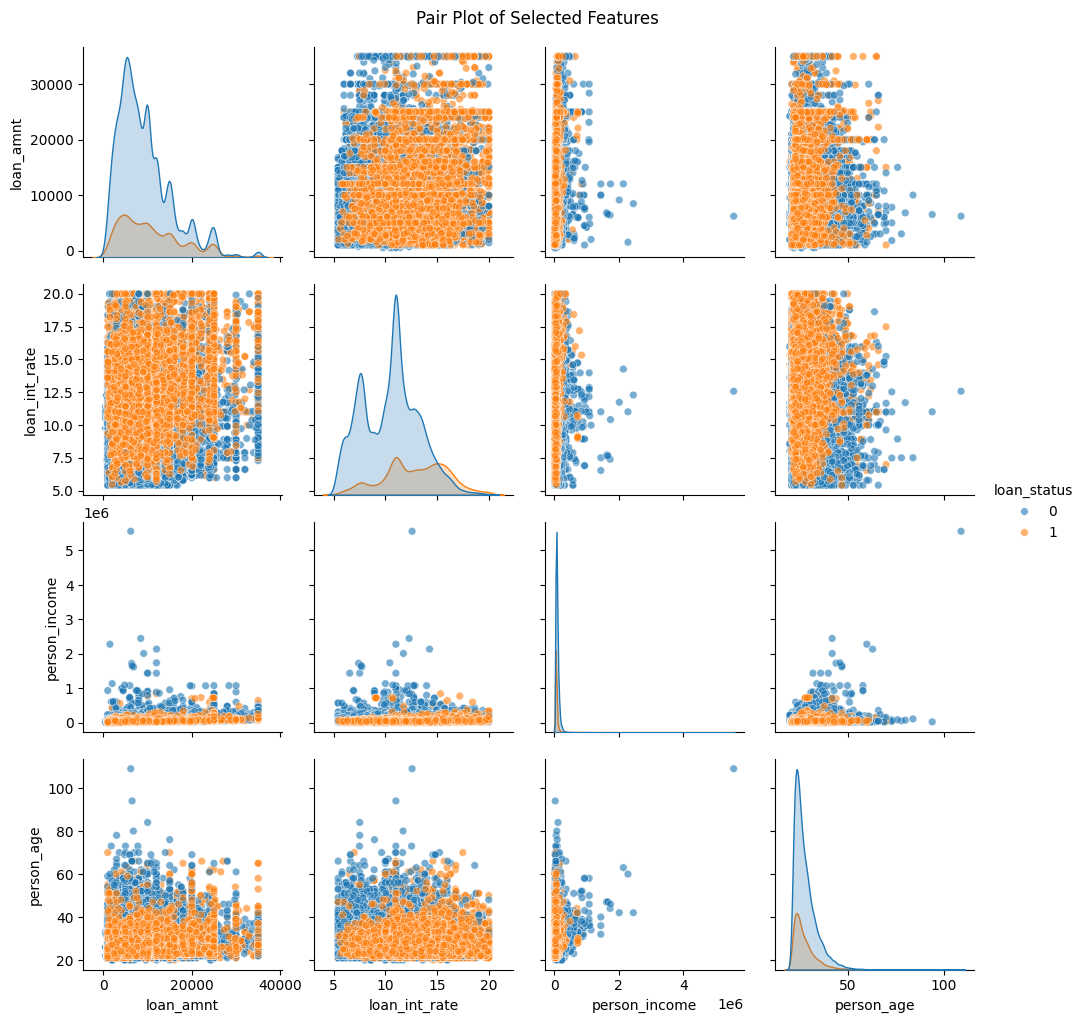

In [23]:
selected_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age']
plt.figure(figsize=(10, 8))
sns.pairplot(df[selected_features + ['loan_status']], 
             hue='loan_status',  
             plot_kws={'alpha': 0.6, 's': 30}) 

plt.suptitle('Pair Plot of Selected Features', y=1.02) 
plt.show()

# 3. Feature Engineering

## 3.1. Handling categorical features

### Nominal features

In [24]:
nominal_variables = ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

In [25]:
for var in nominal_variables : 
    print(df[var].unique())

['female' 'male']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['No' 'Yes']


#### Binary Encoding for `person_gender` & `previous_loan_defaults_on_file`

`person_gender` (`female` = 0 , `male` = 1) | `previous_loan_defaults_on_file` ( `No` = 0 , `Yes` = 1)

In [26]:
df['person_gender'] = df['person_gender'].map({'female' : 0, 'male' : 1})
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No' : 0, 'Yes' : 1})

#### One hot encoding for `person_home_ownership` & `loan_intent`

In [27]:
df = pd.get_dummies(df, columns = ['person_home_ownership','loan_intent'], prefix = ['home','intent'], drop_first = False)

### Ordinal features

In [28]:
print(df['person_education'].unique())

['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


In [29]:
education_order = [['High School','Associate','Bachelor','Master','Doctorate']]
ordinal_encoder = OrdinalEncoder(categories = education_order)
# Appliquer l'encodeur sur la colonne `person_education`
df['person_education'] = ordinal_encoder.fit_transform(df[['person_education']])
# Convertir en integer pour la cohérence
df['person_education'] = df['person_education'].astype(int)

In [30]:
# Commencer le classement par 1 
df['person_education'] += 1

In [31]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,home_MORTGAGE,home_OTHER,home_OWN,home_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,...,False,False,False,True,False,False,False,False,True,False
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,...,False,False,True,False,False,True,False,False,False,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,...,True,False,False,False,False,False,False,True,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,...,False,False,False,True,False,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,...,False,False,False,True,False,False,False,True,False,False


In [32]:
#Target column -> last column
df['loan_status'] = df.pop('loan_status')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44994 entries, 0 to 44999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44994 non-null  float64
 1   person_gender                   44994 non-null  int64  
 2   person_education                44994 non-null  int64  
 3   person_income                   44994 non-null  float64
 4   person_emp_exp                  44994 non-null  int64  
 5   loan_amnt                       44994 non-null  float64
 6   loan_int_rate                   44994 non-null  float64
 7   loan_percent_income             44994 non-null  float64
 8   cb_person_cred_hist_length      44994 non-null  float64
 9   credit_score                    44994 non-null  int64  
 10  previous_loan_defaults_on_file  44994 non-null  int64  
 11  home_MORTGAGE                   44994 non-null  bool   
 12  home_OTHER                      44994

## Correlation Matrix after transforming the data

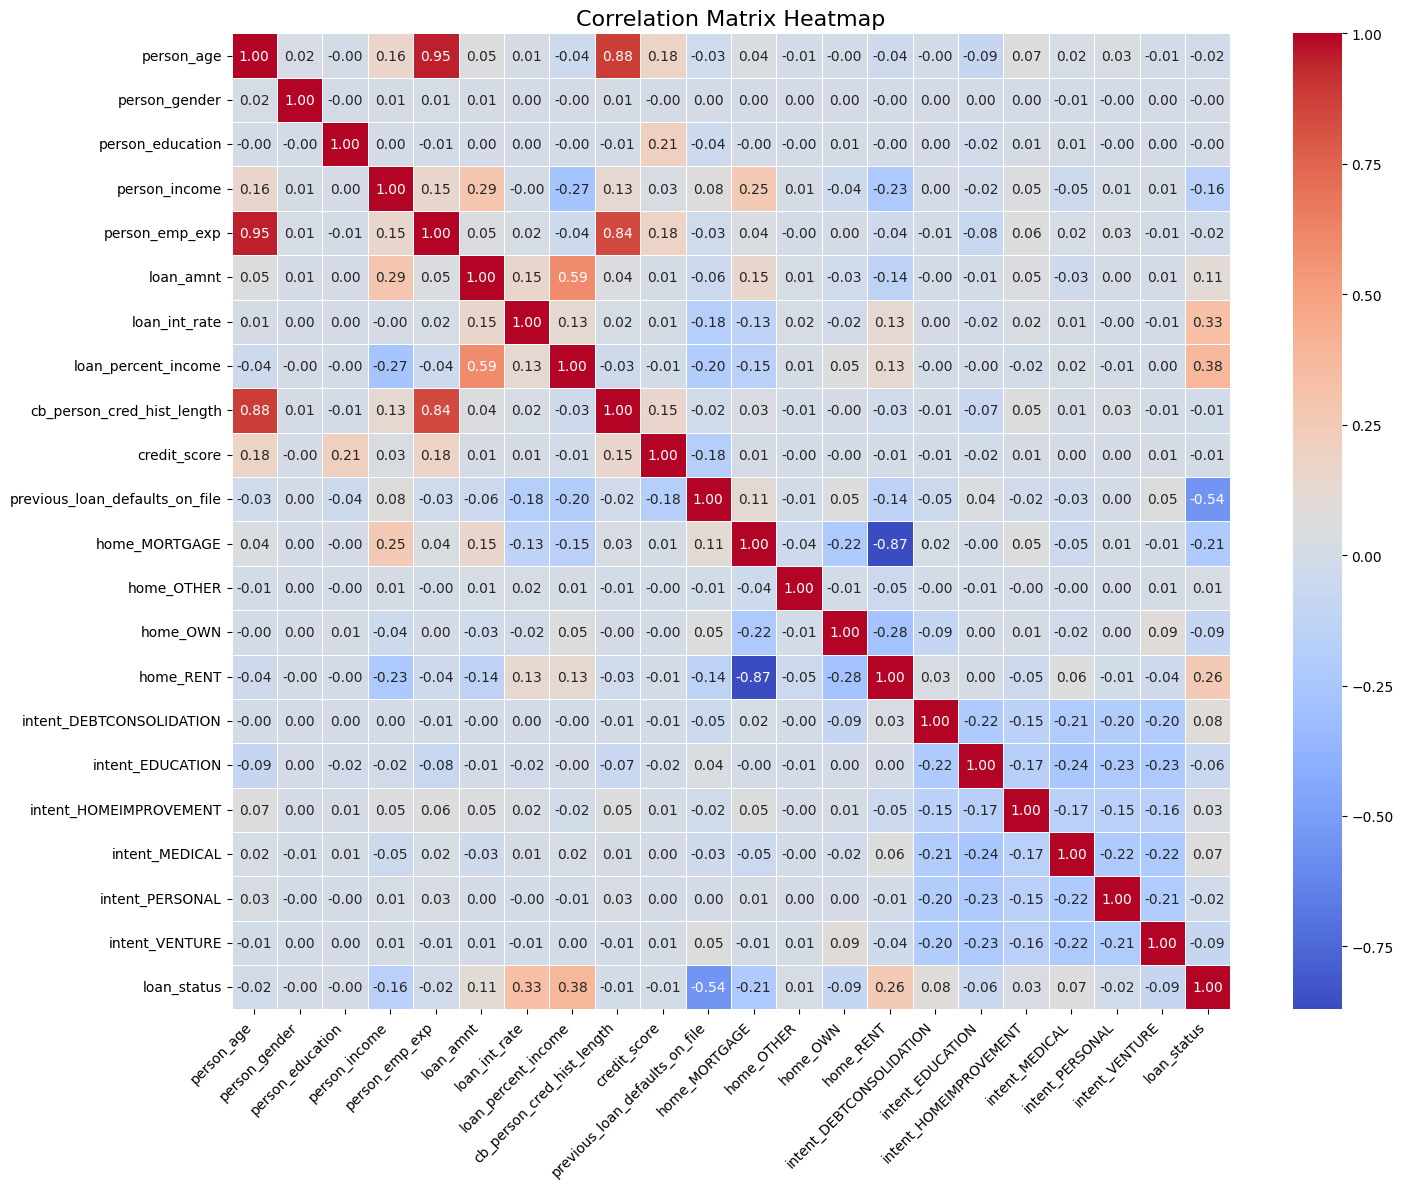

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            annot=True,        
            fmt=".2f",        
            cmap="coolwarm",  
            annot_kws={"size": 10},  
            linewidths=0.5)
plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.yticks(fontsize=10) 
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.tight_layout()
plt.show()

In [34]:
# Convert cleaned dataframe into csv file for later use
df.to_csv('../Data/cleaned_loan_data.csv', index=False, encoding='utf-8')

In [35]:
df_loaded = pd.read_csv('../Data/cleaned_loan_data.csv')

In [36]:
df_loaded.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,home_OTHER,home_OWN,home_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,loan_status
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,...,False,False,True,False,False,False,False,True,False,1
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,...,False,True,False,False,True,False,False,False,False,0
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,...,False,False,False,False,False,False,True,False,False,1
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,...,False,False,True,False,False,False,True,False,False,1
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,...,False,False,True,False,False,False,True,False,False,1
